<font size="6">レポート課題２：住宅価格の回帰</font>

<font size="5">データセットの準備</font>

In [2]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
#import seaborn as sns
#sns.set_style('whitegrid')
%matplotlib inline

from sklearn.datasets import load_boston
# 住宅価格サンプルデータのロード
boston = load_boston()

# Descriptionは説明です。
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

<font size="5">データセットの可視化</font>

Text(0, 0.5, 'Number of houses')

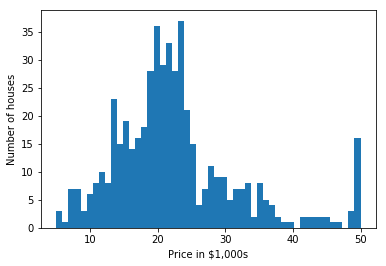

In [3]:
# 価格のヒストグラム(モデルを作って、最終的に予測したい値）
plt.hist(boston.target,bins=50)

plt.xlabel('Price in $1,000s')
plt.ylabel('Number of houses')

Text(0.5, 0, 'Number of rooms')

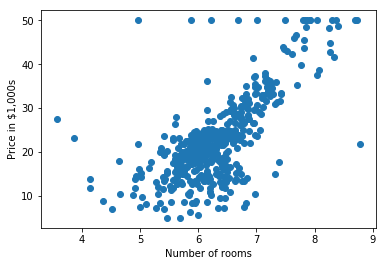

In [5]:
# 散布図
# ラベルがRMになっている5番目の列が、部屋の数です。
plt.scatter(boston.data[:,5],boston.target)

plt.ylabel('Price in $1,000s')
plt.xlabel('Number of rooms')

In [6]:
#データセットの準備

# DataFrameを作ります。
boston_df = DataFrame(boston.data)

# 列名をつけます。
boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [7]:
# DataFrameに新しい列を作って、目的変数（価格）を格納
boston_df['Price'] = boston.target

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
# Added version check for recent scikit-learn 0.18 checks
from distutils.version import LooseVersion as Version
from sklearn import __version__ as sklearn_version

#データを学習用とテスト用に分ける
if Version(sklearn_version) < '0.18':
    from sklearn.cross_validation import train_test_split
else:
    from sklearn.model_selection import train_test_split

In [17]:
import sklearn
#from sklearn.cross_validation import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

# データセットの分割
X_multi = boston_df.drop('Price',1)
Y_target = boston_df.Price

# 説明変数をX、目的変数をYとして受け取ります。
X_train, X_test, Y_train, Y_test = train_test_split(X_multi,boston_df.Price)

<font size="5">重回帰（多変数による回帰）分析</font><BR>
(ここを工夫する)

In [18]:
import sklearn
from sklearn.linear_model import LinearRegression

# モデルの作成
lreg = LinearRegression()

In [19]:
# fitでモデルを作りますが、使うのは学習用のデータだけ
lreg.fit(X_train,Y_train)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:485: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  linalg.lstsq(X, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

<font size="5">検証と結果の可視化</font>

In [20]:
# 平均二乗誤差は、標準偏差に対応
pred_test = lreg.predict(X_test)
print('モデルの平均二乗誤差＝{:0.2f}'.format(np.mean((Y_test - pred_test) ** 2))) # この数値を報告する

モデルの平均二乗誤差＝23.54


Text(0.5, 1.0, 'Residual Plots')

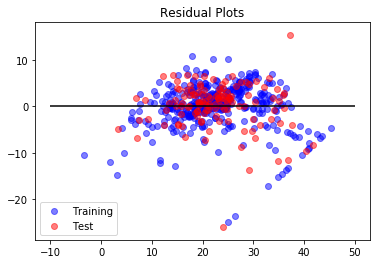

In [21]:
# 残渣(実際に観測された値と、モデルが予測した値の差)のプロット
# y=0 近辺にデータが集まればよいモデルといえる

# 学習用のデータの残差プロットです。
pred_train = lreg.predict(X_train)
train = plt.scatter(pred_train,(pred_train-Y_train),c='b',alpha=0.5)

# テスト用のデータの残差プロットです。
test = plt.scatter(pred_test,(pred_test-Y_test),c='r',alpha=0.5)

# y=0の水平な線を描いておきます。
plt.hlines(y=0,xmin=-10,xmax=50)

plt.legend((train,test),('Training','Test'),loc='lower left')
plt.title('Residual Plots')